<h1>
    EDA on Sustainable Companies Driving Green Initiatives
</h1>


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [ ]:
# Use encoding='ISO-8859-1' if a UTF-8 error occurs

df = pd.read_csv("/kaggle/input/top-100-most-sustainable-corporations/most sustainable corporations.csv", encoding='ISO-8859-1')

In [ ]:
df.head()

,Rank,Previous Rank,Company,Location,Industry,Revenue,Profit %,CEO Pay Ratio,Women on Board %,Women in Leadership %,Women in Workforce %,Climate Grade,Sustainability Initiatives
0,1,14,Sims Ltd,"Mascot, Australia",Waste management,"$ 38,525",16%,36:1,38%,100%,100%,A+,NaN
1,2,3,Brambles Ltd,"Sydney, Australia",Furniture and general manufacturing,"$ 123,791",12%,61:1,36%,100%,100%,A,"1.5°C, SBTi"
2,3,2,Vestas Wind Systems A/S,"Aarhus, Denmark",Machinery manufacturing,"$ 141,969",19%,70:1,42%,100%,100%,A,"1.5°C, SBTi"
3,4,9,Taiwan High Speed Rail Corp,"Taipei, Taiwan",Transit and ground transportation,"$ 7,698",0%,11:1,15%,100%,100%,A,NaN
4,5,NaN,Nordex SE,"Hamburg, Germany",Machinery manufacturing,"$ 160,887",73%,82:1,33%,100%,100%,A,"1.5°C, SBTi"


In [ ]:
df.columns

Index(['Rank', 'Previous Rank', 'Company', 'Location', 'Industry', 'Revenue',
       'Profit %', 'CEO Pay Ratio', 'Women on Board %',
       'Women in Leadership %', 'Women in Workforce %', 'Climate Grade',
       'Sustainability Initiatives'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Rank                        100 non-null    int64 
 1   Previous Rank               68 non-null     object
 2   Company                     100 non-null    object
 3   Location                    100 non-null    object
 4   Industry                    100 non-null    object
 5   Revenue                     96 non-null     object
 6   Profit %                    100 non-null    object
 7   CEO Pay Ratio               82 non-null     object
 8   Women on Board %            100 non-null    object
 9   Women in Leadership %       100 non-null    object
 10  Women in Workforce %        100 non-null    object
 11  Climate Grade               99 non-null     object
 12  Sustainability Initiatives  73 non-null     object
dtypes: int64(1), object(12)
memory usage: 10.3+ KB


In [ ]:
# Change Revenue to a numeric format
df['Revenue'] = df['Revenue'].replace('[\$,]', '', regex=True).astype(float)

# Change Profit % to numeric
df['Profit %'] = df['Profit %'].replace('%', '', regex=True).astype(float)

# Change percentage columns to numeric
df['Women on Board %'] = df['Women on Board %'].replace('%', '', regex=True).astype(float)
df['Women in Leadership %'] = df['Women in Leadership %'].replace('%', '', regex=True).astype(float)
df['Women in Workforce %'] = df['Women in Workforce %'].replace('%', '', regex=True).astype(float)

# Change Previous Rank to numeric (if applicable)
df['Previous Rank'] = pd.to_numeric(df['Previous Rank'], errors='coerce')

df.head()

,Rank,Previous Rank,Company,Location,Industry,Revenue,Profit %,CEO Pay Ratio,Women on Board %,Women in Leadership %,Women in Workforce %,Climate Grade,Sustainability Initiatives
0,1,14.0,Sims Ltd,"Mascot, Australia",Waste management,38525.0,16.0,36:1,38.0,100.0,100.0,A+,NaN
1,2,3.0,Brambles Ltd,"Sydney, Australia",Furniture and general manufacturing,123791.0,12.0,61:1,36.0,100.0,100.0,A,"1.5°C, SBTi"
2,3,2.0,Vestas Wind Systems A/S,"Aarhus, Denmark",Machinery manufacturing,141969.0,19.0,70:1,42.0,100.0,100.0,A,"1.5°C, SBTi"
3,4,9.0,Taiwan High Speed Rail Corp,"Taipei, Taiwan",Transit and ground transportation,7698.0,0.0,11:1,15.0,100.0,100.0,A,NaN
4,5,NaN,Nordex SE,"Hamburg, Germany",Machinery manufacturing,160887.0,73.0,82:1,33.0,100.0,100.0,A,"1.5°C, SBTi"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rank                        100 non-null    int64  
 1   Previous Rank               67 non-null     float64
 2   Company                     100 non-null    object 
 3   Location                    100 non-null    object 
 4   Industry                    100 non-null    object 
 5   Revenue                     96 non-null     float64
 6   Profit %                    100 non-null    float64
 7   CEO Pay Ratio               82 non-null     object 
 8   Women on Board %            100 non-null    float64
 9   Women in Leadership %       100 non-null    float64
 10  Women in Workforce %        100 non-null    float64
 11  Climate Grade               99 non-null     object 
 12  Sustainability Initiatives  73 non-null     object 
dtypes: float64(6), int64(1), object(6)
m

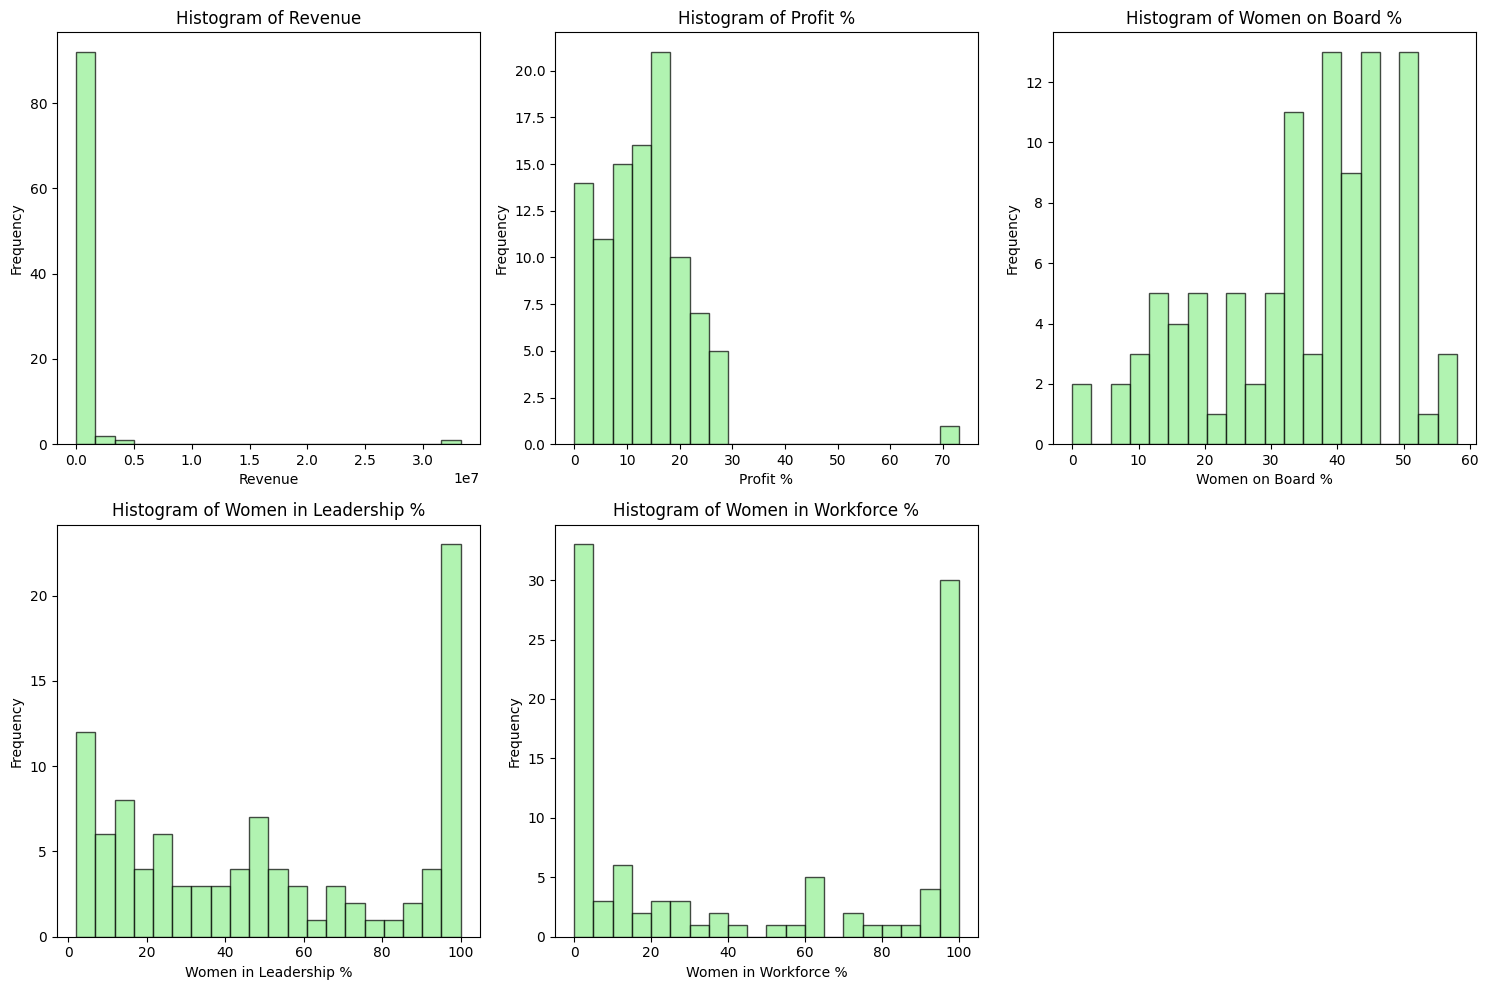

In [ ]:
numerical_columns = ['Revenue', 'Profit %', 'Women on Board %', 'Women in Leadership %', 'Women in Workforce %']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    plt.hist(df[col].dropna(), bins=20, edgecolor='k', alpha=0.7, color = "lightgreen")
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

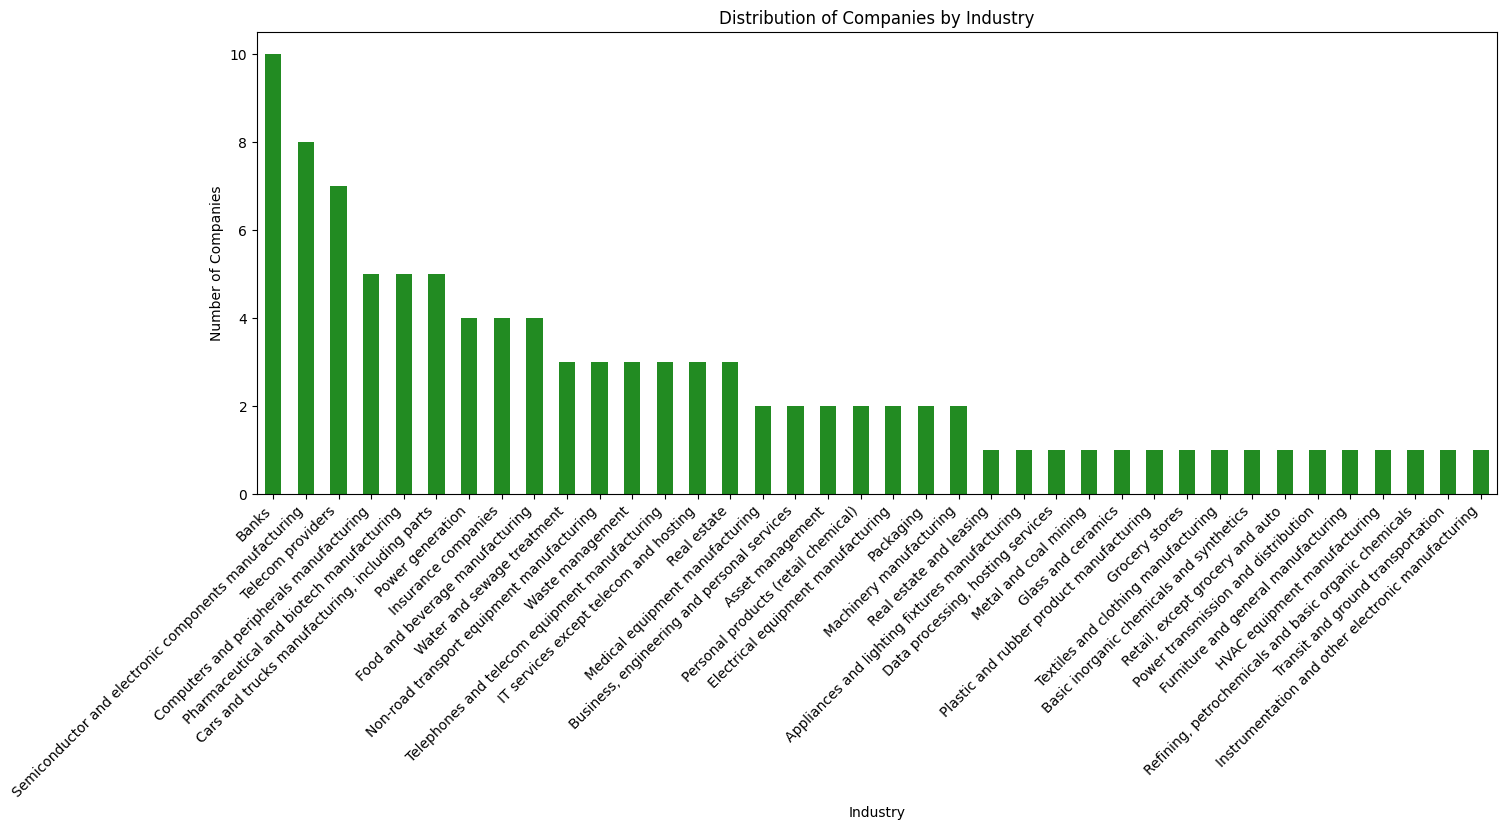

In [ ]:
# Bar chart for Industry distribution
plt.figure(figsize=(16, 6))
df['Industry'].value_counts().plot(kind='bar', color='forestgreen')
plt.title('Distribution of Companies by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right')
plt.show()

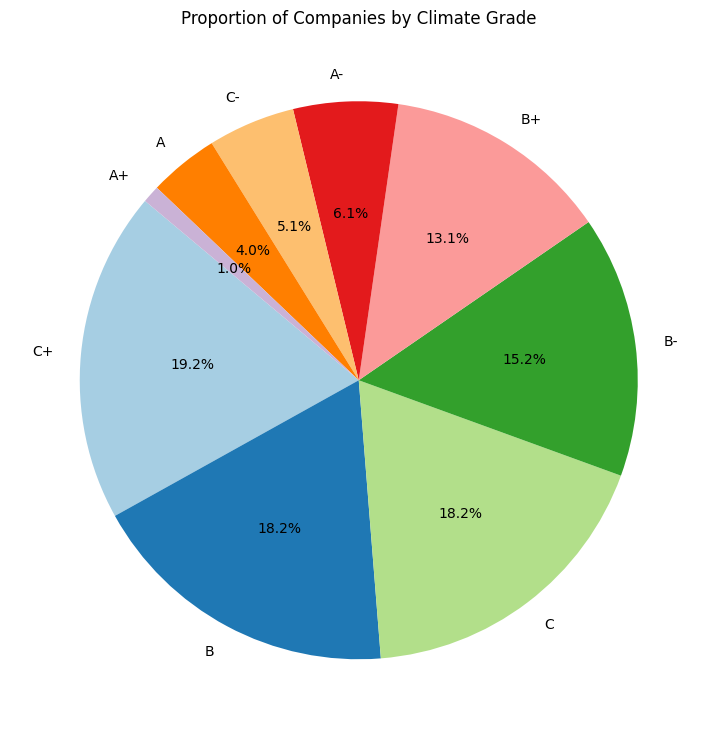

In [ ]:
# Pie chart for Climate Grade distribution
plt.figure(figsize=(9, 16))
df['Climate Grade'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=140)
plt.title('Proportion of Companies by Climate Grade')
plt.ylabel('')
plt.show()

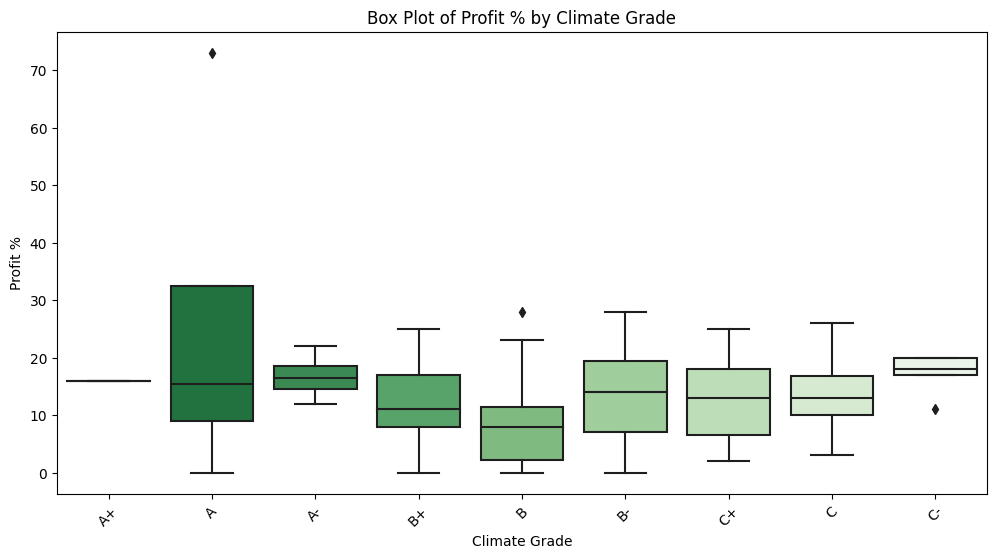

In [ ]:
# Box plot for Profit % by Climate Grade
plt.figure(figsize=(12, 6))
sns.boxplot(x='Climate Grade', y='Profit %', data=df, palette='Greens_r')
plt.title('Box Plot of Profit % by Climate Grade')
plt.xlabel('Climate Grade')
plt.ylabel('Profit %')
plt.xticks(rotation=45)
plt.show()

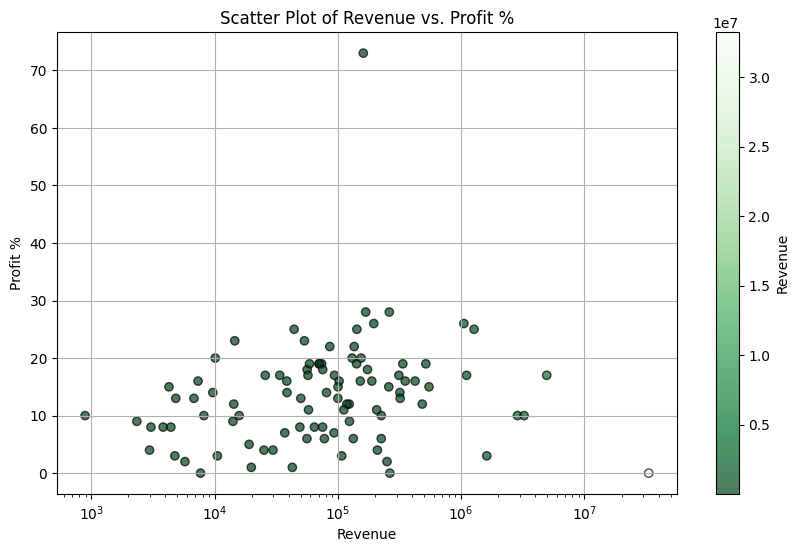

In [ ]:
# Adjusting values for color mapping normalization.
norm_revenue = mcolors.Normalize(vmin=df['Revenue'].min(), vmax=df['Revenue'].max())
norm_profit = mcolors.Normalize(vmin=df['Profit %'].min(), vmax=df['Profit %'].max())

# colormap
cmap_revenue = cm.ScalarMappable(norm=norm_revenue, cmap='viridis')
cmap_profit = cm.ScalarMappable(norm=norm_profit, cmap='plasma')

plt.figure(figsize=(10, 6))
sc = plt.scatter(df['Revenue'], df['Profit %'], c=df['Revenue'], cmap='Greens_r', edgecolors='k', alpha=0.7, norm=norm_revenue)
plt.colorbar(sc, label='Revenue')
plt.title('Scatter Plot of Revenue vs. Profit %')
plt.xlabel('Revenue')
plt.ylabel('Profit %')
plt.xscale('log')
plt.yscale('linear')
plt.grid(True)
plt.show()

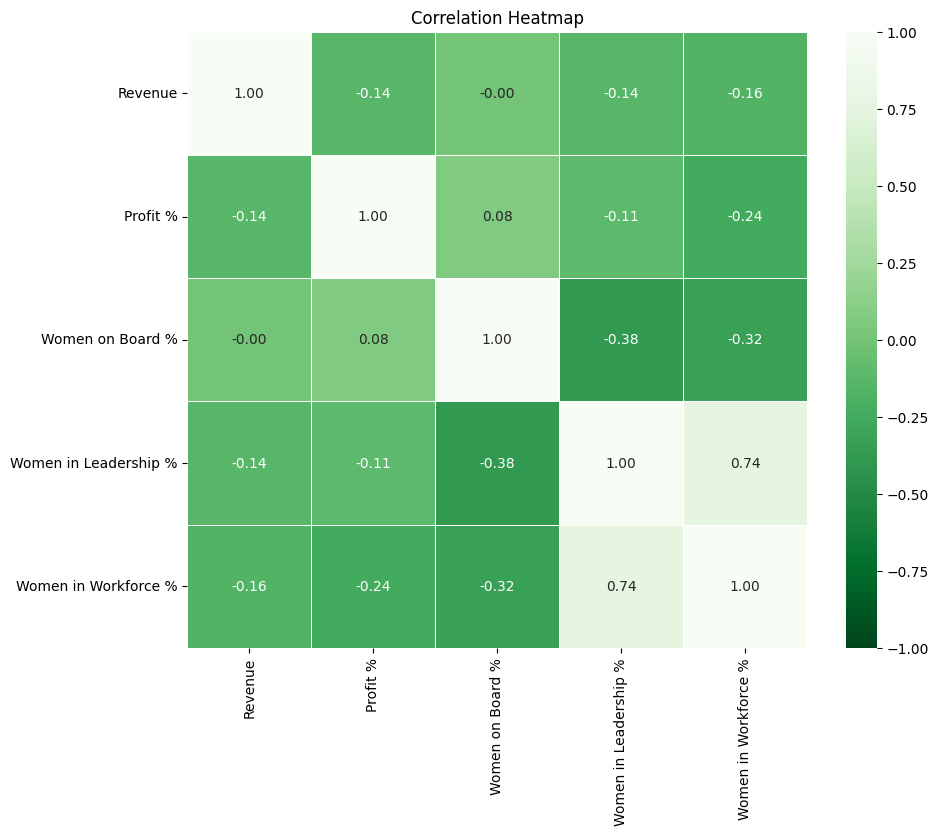

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens_r', vmin=-1, vmax=1, center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df_revenue = df.dropna(subset=['Revenue'])

# Sort by Revenue and retrieve the top 10
top_10_revenue = df_revenue.nlargest(10, 'Revenue')

print("Top 10 Companies by Revenue:")
top_10_revenue[['Company', 'Revenue']]

Top 10 Companies by Revenue:


,Company,Revenue
25,Wheaton Precious Metals Corp,33251733.0
95,IGM Financial Inc,4947231.0
82,Nordea Bank Abp,3242058.0
36,Beazley PLC,2864982.0
86,Prologis Inc,1614690.0
90,Assicurazioni Generali SpA,1273258.0
5,Banco do Brasil SA,1106800.0
81,Svenska Handelsbanken AB,1052698.0
78,Sun Life Financial Inc,549255.0
10,Autodesk Inc,517478.0


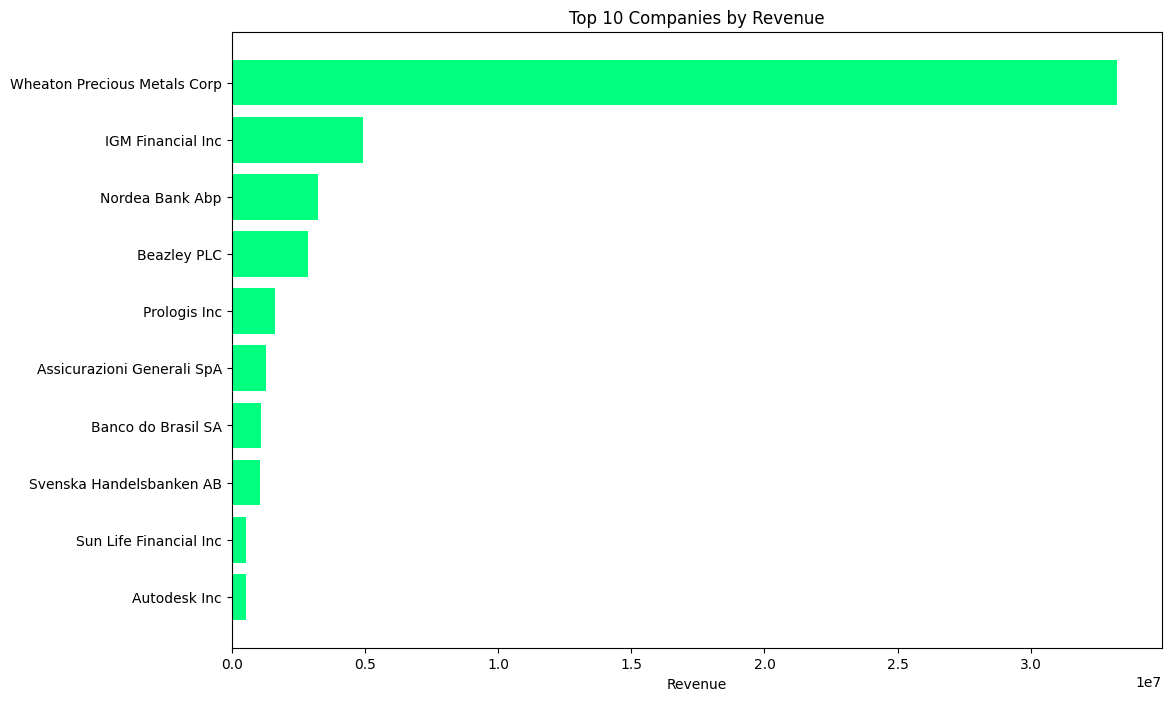

In [ ]:
plt.figure(figsize=(12, 8))
plt.barh(top_10_revenue['Company'], top_10_revenue['Revenue'], color='springgreen')
plt.xlabel('Revenue')
plt.title('Top 10 Companies by Revenue')
plt.gca().invert_yaxis()  # Flip the y-axis to enhance readability.
plt.show()

In [ ]:
df_profit = df.dropna(subset=['Profit %'])

# Sorting by Profit % and get top 10
top_10_profit = df_profit.nlargest(10, 'Profit %')

print("Top 10 Companies by Profit %:")
top_10_profit[['Company', 'Profit %']]

Top 10 Companies by Profit %:


,Company,Profit %
4,Nordex SE,73.0
32,Zhuzhou CRRC Times Electric Co Ltd,28.0
44,Kering SA,28.0
47,SAP SE,28.0
56,Intesa Sanpaolo SpA,26.0
81,Svenska Handelsbanken AB,26.0
22,Trane Technologies PLC,25.0
64,KB Financial Group Inc,25.0
90,Assicurazioni Generali SpA,25.0
29,Risen Energy Co Ltd,23.0


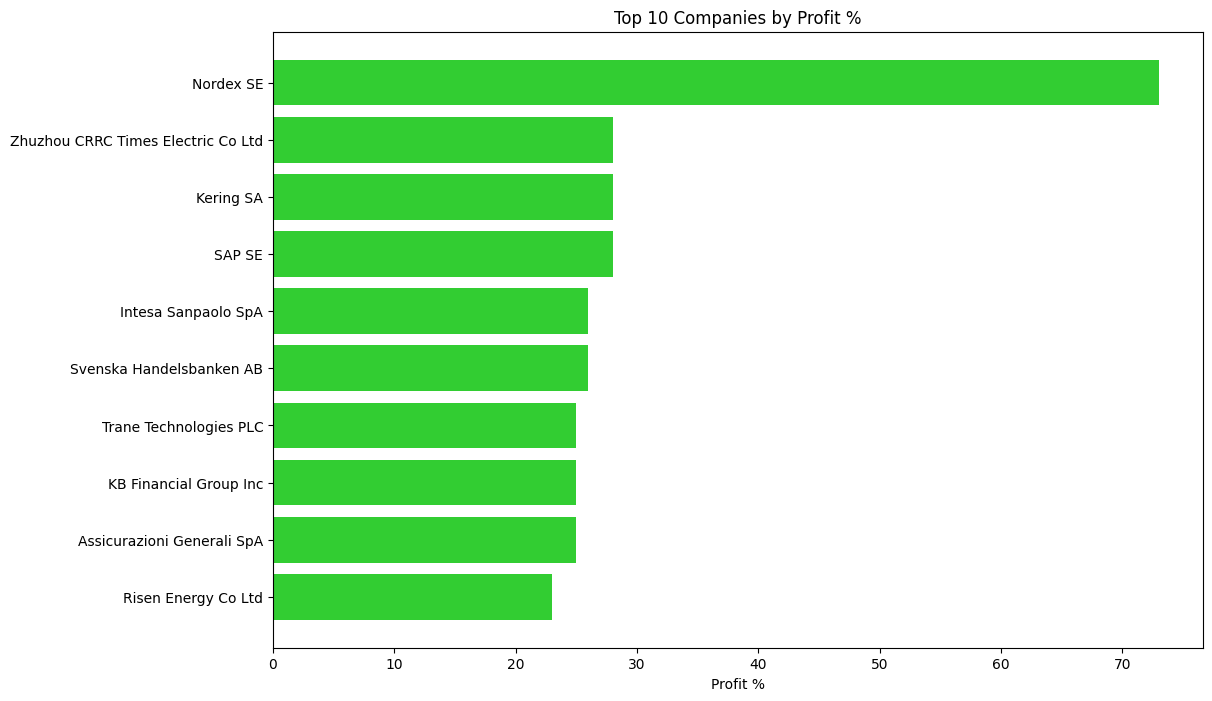

In [ ]:
plt.figure(figsize=(12, 8))
plt.barh(top_10_profit['Company'], top_10_profit['Profit %'], color='limegreen')
plt.xlabel('Profit %')
plt.title('Top 10 Companies by Profit %')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [ ]:
df_profit = df.dropna(subset=['Profit %'])

# Grouping by Industry and calculating the mean Profit %
industry_profit = df_profit.groupby('Industry')['Profit %'].mean().sort_values(ascending=False)

# Get top 5 industries
top_5_industry_profit = industry_profit.head(5)

top_5_industry_profit

Industry
Machinery manufacturing                46.0
Retail, except grocery and auto        28.0
HVAC equipment manufacturing           25.0
Electrical equipment manufacturing     22.0
Personal products (retail chemical)    21.0
Name: Profit %, dtype: float64

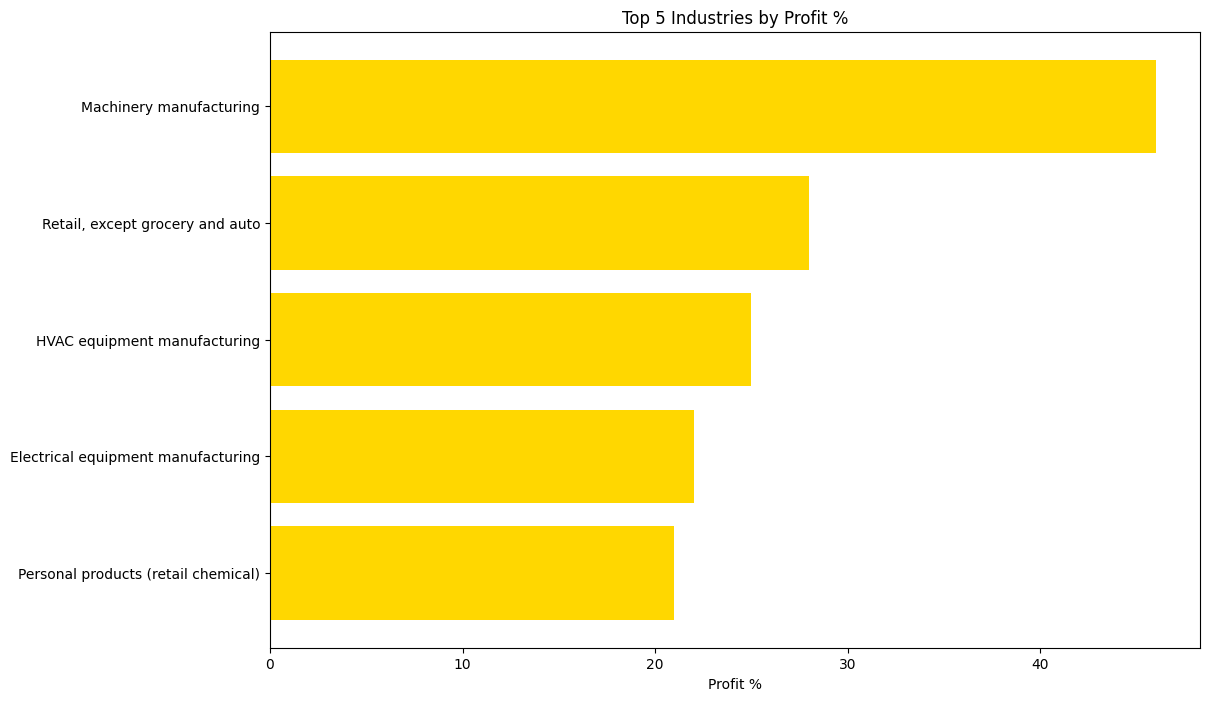

In [ ]:
plt.figure(figsize=(12, 8))
plt.barh(top_5_industry_profit.index, top_5_industry_profit.values, color='gold')
plt.xlabel('Profit %')
plt.title('Top 5 Industries by Profit %')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [ ]:
df_women_on_board = df.dropna(subset=['Women on Board %'])

# Grouping by Industry and calculating the mean Women on Board %
industry_women_on_board = df_women_on_board.groupby('Industry')['Women on Board %'].mean().sort_values(ascending=False)

top_5_industry_women_on_board = industry_women_on_board.head(5)

top_5_industry_women_on_board

Industry
Insurance companies                       49.750000
IT services except telecom and hosting    48.000000
Retail, except grocery and auto           46.000000
HVAC equipment manufacturing              45.000000
Waste management                          44.333333
Name: Women on Board %, dtype: float64

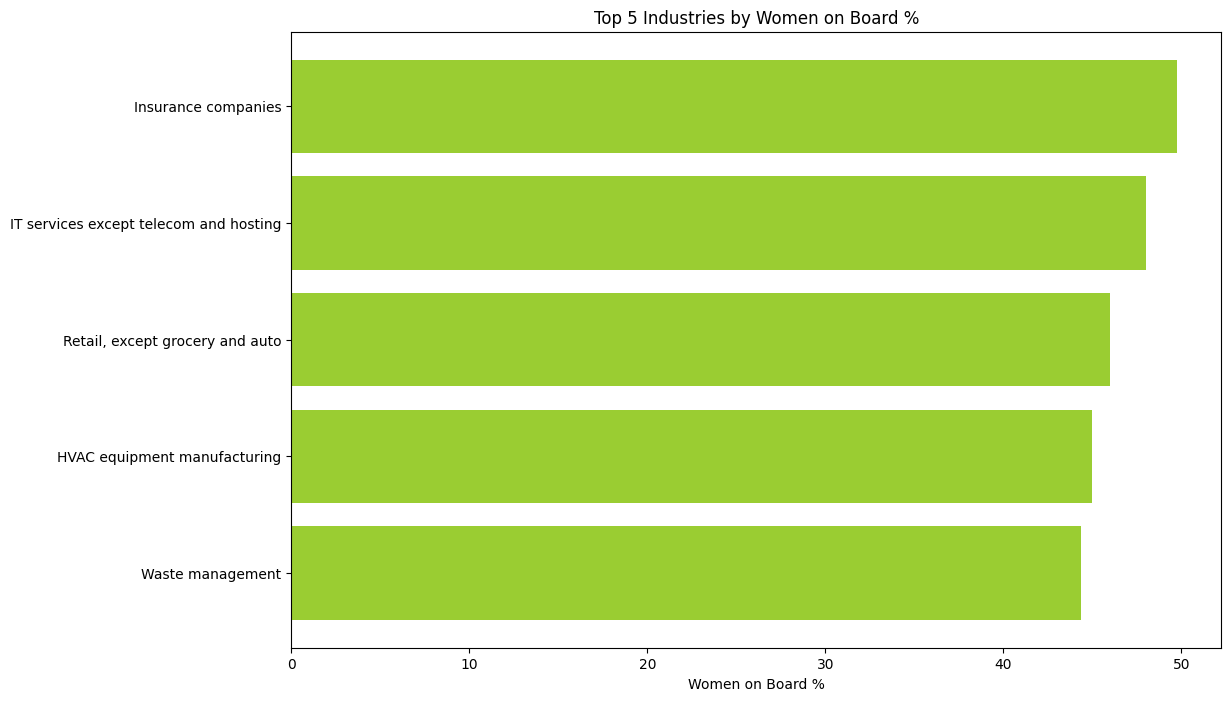

In [ ]:
plt.figure(figsize=(12, 8))
plt.barh(top_5_industry_women_on_board.index, top_5_industry_women_on_board.values, color='yellowgreen')
plt.xlabel('Women on Board %')
plt.title('Top 5 Industries by Women on Board %')
plt.gca().invert_yaxis()
plt.show()